# <font color=red> *Implementation of the K-NEAREST NEIGHBORS, K-NEAREST WEIGHTED NEIGHBORS, RADIUS NEIGHBORS, RADIUS WEIGHTED NEIGHBORS Algorithms* </font>

In [25]:
from sklearn import datasets
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [26]:
data= datasets.load_iris()

In [27]:
x=data["data"]
y=data["target"]

In [28]:
rnd= default_rng(seed=12)
permutation= rnd.permutation(len(y))

In [29]:
x= x[permutation]
y= y[permutation]

In [30]:
n= int(len(y)*0.8)

In [31]:
train_x= x[:n]
train_y= y[:n]
test_x= x[n:]
test_y= y[n:]

## <font color=blue> *K-NEAREST NEIGHBORS* </font>

In [32]:
class K_Nearest_Neighbors:
    
    def __init__(self,k):
        self.k=k
    
    def fit(self,train_x,train_y):
        self.train_x=train_x
        self.train_y=train_y
    
    def predict_single(self,test_x):
        train_x= self.train_x
        train_y= self.train_y
        k= self.k
    
        distances=np.zeros(shape=(len(train_y,)))
    
        for i in range(len(train_x)):
            d= np.sqrt(np.sum((train_x[i]-test_x)**2))
            distances[i]=d
        
        sorting = np.argsort(distances)
        k_neighbors = sorting[:k]
        neighbors_label = train_y[k_neighbors]
                      
        pred_new=np.argmax(np.bincount(neighbors_label))
        return pred_new

    def predicts(self, test_x):
        preds= []
        for i in range(test_x.shape[0]):
            preds.append(self.predict_single(test_x[i]))
        return np.array(preds)

In [33]:
def accuracy(test_y, y_preds):
    return np.sum(test_y==y_preds)/len(test_y)

In [34]:
accuracies= []
accuracies_tr = []
k_list = range(1,30)

for k in k_list:
    knn= K_Nearest_Neighbors(k)
    model= knn.fit(train_x,train_y)
    preds= knn.predicts(test_x)
    acc= accuracy(test_y, preds)
    accuracies.append(acc)
    y_preds_tr = knn.predicts(train_x)
    acc_tr = accuracy(train_y,y_preds_tr)
    accuracies_tr.append(acc_tr)

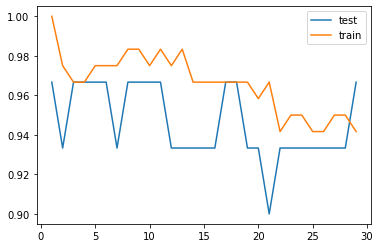

In [35]:
plt.figure()
plt.plot(k_list, accuracies,label='test')
plt.plot(k_list, accuracies_tr,label='train')
plt.legend()
plt.show()

## <font color=blue> *K-NEAREST WEIGHTED NEIGHBOR* </font>

In [36]:
class K_Nearest_Weighted_Neighbors:
    
    def __init__(self,k):
        self.k=k
    
    def fit(self,train_x,train_y):
        self.train_x=train_x
        self.train_y=train_y
    
    def predict_single(self,test_x):
        train_x= self.train_x
        train_y= self.train_y
        k= self.k
    
        distances=np.zeros(shape=(len(train_y,)))
    
        for i in range(len(train_x)):
            d= np.sqrt(np.sum((train_x[i]-test_x)**2))
            distances[i]=d
        
        sorting = np.argsort(distances)
        k_neighbors = sorting[:k]
        neighbors_label = train_y[k_neighbors]
        
        weight_distances= distances[k_neighbors]
        classes= np.unique(train_y)
        weights= []
        for c in classes:
            d= weight_distances[neighbors_label==c]
            w= np.sum(1./d)
            weights.append(w)
            
        pred_new= classes[np.argmax(weights)]
                      
        return pred_new

    def predicts(self, test_x):
        preds= []
        for i in range(test_x.shape[0]):
            preds.append(self.predict_single(test_x[i]))
        return np.array(preds)

In [37]:
def accuracy(test_y, y_preds):
    return np.sum(test_y==y_preds)/len(test_y)

In [38]:
accuracies= []
accuracies_tr = []
k_list = range(1,30)

for k in k_list:
    knn= K_Nearest_Weighted_Neighbors(k)
    model= knn.fit(train_x,train_y)
    preds= knn.predicts(test_x)
    acc= accuracy(test_y, preds)
    accuracies.append(acc)
    y_preds_tr = knn.predicts(train_x)
    acc_tr = accuracy(train_y,y_preds_tr)
    accuracies_tr.append(acc_tr)

<ipython-input-36-d08f911c0298>:30: RuntimeWarning: divide by zero encountered in true_divide
  w= np.sum(1./d)


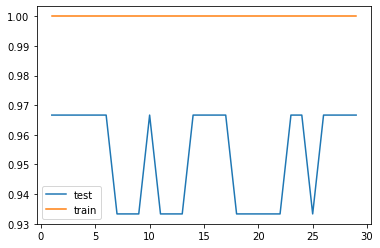

In [40]:
plt.figure()
plt.plot(k_list, accuracies,label='test')
plt.plot(k_list, accuracies_tr,label='train')
plt.legend()
plt.show()

## <font color=blue> *RADIUS NEIGHBORS* </font>

In [41]:
class Radius_Neighbors:
    
    def __init__(self,r):
        self.r=r
    
    def fit(self,train_x,train_y):
        self.train_x=train_x
        self.train_y=train_y
       
    def predict_single(self,test_x):
        train_x= self.train_x
        train_y= self.train_y
        r=self.r
    
        distances=np.zeros(shape=(len(train_y),))
    
        for i in range(len(train_x)):
            d= np.sqrt(np.sum((train_x[i]-test_x)**2))
            distances[i]=d
        
        k_neighbors= []    
        
        for i in range(len(train_x)):
            if distances[i]<=r:
                k_neighbors.append(train_y[i])
        k_neighbors=np.array(k_neighbors)                   
        pred_new=np.argmax(np.bincount(k_neighbors))
        return pred_new
    
    def predicts(self,test_x):
        preds= []
        for i in range(test_x.shape[0]):
            preds.append(self.predict_single(test_x[i]))
        return np.array(preds)


In [42]:
def accuracy(test_y, y_preds):
    return np.sum(test_y==y_preds)/len(test_y)

In [43]:
accuracies= []
accuracies_tr = []
r_list=range(1,5)

for r in r_list:
    rn= Radius_Neighbors(r)
    model= rn.fit(train_x,train_y)
    preds= rn.predicts(test_x)
    acc= accuracy(test_y, preds)
    accuracies.append(acc)
    y_preds_tr = rn.predicts(train_x)
    acc_tr = accuracy(train_y,y_preds_tr)
    accuracies_tr.append(acc_tr)

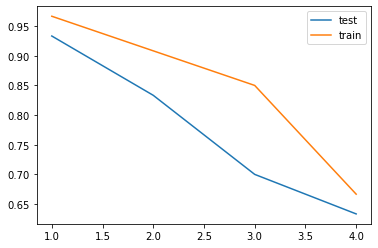

In [44]:
plt.figure()
plt.plot(r_list, accuracies,label='test')
plt.plot(r_list, accuracies_tr,label='train')
plt.legend()
plt.show()

## <font color=blue> *RADIUS WEIGHTED NEIGHBORS* </font>

In [45]:
class Radius_Weighted_Neighbors:
    
    def __init__(self,r):
        self.r=r
    
    def fit(self,train_x,train_y):
        self.train_x=train_x
        self.train_y=train_y
    
    def predict_single(self,test_x):
        train_x= self.train_x
        train_y= self.train_y
        r= self.r
    
        distances=np.zeros(shape=(len(train_y,)))
    
        for i in range(n):
            d= np.sqrt(np.sum((train_x[i]-test_x)**2))
            distances[i]=d
        
        k_neighbors= []    
        
        for i in range(n):
            if distances[i]<=r:
                k_neighbors.append(train_y[i])
                
        k_neighbors=np.array(k_neighbors)        
        weight_distances= distances[k_neighbors]        
        
                           
        classes= np.unique(train_y)
        weights= []
        for c in classes:
            d= weight_distances[k_neighbors==c]
            w= np.sum(1./d)
            weights.append(w)
            
        pred_new= classes[np.argmax(weights)]
                      
        return pred_new
    
    def predicts(self,test_x):
        preds= []
        for i in range(test_x.shape[0]):
            preds.append(self.predict_single(test_x[i]))
        return np.array(preds)


In [46]:
def accuracy(test_y, y_preds):
    return np.sum(test_y==y_preds)/len(test_y)

In [47]:
accuracies= []
accuracies_tr = []
r_list=range(1,4)

for r in r_list:
    rd= Radius_Weighted_Neighbors(r)
    model= rd.fit(train_x,train_y)
    preds= rd.predicts(test_x)
    acc= accuracy(test_y, preds)
    accuracies.append(acc)
    y_preds_tr = rd.predicts(train_x)
    acc_tr = accuracy(train_y,y_preds_tr)
    accuracies_tr.append(acc_tr)

<ipython-input-45-3880253de280>:35: RuntimeWarning: divide by zero encountered in true_divide
  w= np.sum(1./d)


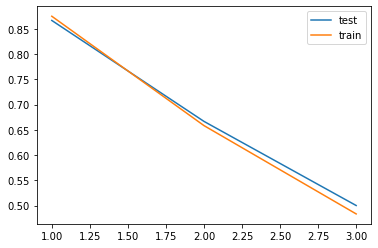

In [48]:
plt.figure()
plt.plot(r_list, accuracies,label='test')
plt.plot(r_list, accuracies_tr,label='train')
plt.legend()
plt.show()